<a href="https://colab.research.google.com/github/abh22/Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:


dataset=pd.read_csv('/content/drive/MyDrive/titanic-passengers.csv',delimiter=';', encoding='utf-8')

In [60]:


dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [61]:
print(dataset.info)

<bound method DataFrame.info of      PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex   Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male  28.0      0   
1                              Moen, Mr. Sigurd Hansen    male  25.0      0   
2                               Jensen, Mr. Hans Peder    male  20.0      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   
4                               Davidson, Mr. Thornton    male  31.0      1   
..                                               

In [62]:
# @title Adding missing values to age and embarked
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
average=dataset.Age.mean()
average

29.69911764705882

In [64]:
average=(int(average))
average

29

In [65]:
dataset.loc[dataset.Age.isnull(),"Age"]=average
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
dataset.value_counts(dataset.Embarked)

Embarked
S    644
C    168
Q     77
dtype: int64

In [67]:
dataset.loc[dataset.Embarked.isnull(),"Embarked"]="S"
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [68]:
dataset.duplicated().any()

False

In [69]:
dataset.loc[dataset["Cabin"].isnull(),"Cabin"]="No cabin"
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,No cabin,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,No cabin,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,No cabin,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [70]:
# @title Replacing survived values by 0 and 1
survived_replacements={"No":0,"Yes":1}
dataset['Survived']=dataset['Survived'].replace(survived_replacements)
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,No cabin,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,No cabin,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,No cabin,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [71]:
# @title Replacing embarked values
embarked_replacements={
    "S":0,
    "C":1,
    "Q":2}
dataset["Embarked"].replace(embarked_replacements,inplace=True)
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,No cabin,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,No cabin,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,No cabin,0
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,0


In [72]:
# @title Extracting title feature from name
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
dataset['Title'] = dataset['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

dataset['Title'] = dataset.Title.map(Title_Dictionary)
dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,No cabin,0,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,0,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,No cabin,0,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,No cabin,0,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,No cabin,1,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,No cabin,1,Mr
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,No cabin,0,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.0,0,0,349215,7.8958,No cabin,0,Mr


In [73]:
# @title Label encoding Cabin feature
dataset["Cabin"].nunique()

148

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [75]:
dataset['Cabin']=le.fit_transform(dataset['Cabin'])
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,146,0,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,140,0,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,146,0,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,146,0,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,38,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,146,1,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,146,1,Mr
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,146,0,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.0,0,0,349215,7.8958,146,0,Mr


In [76]:
# @title Data viz
import matplotlib.pyplot as plt
import seaborn as sns

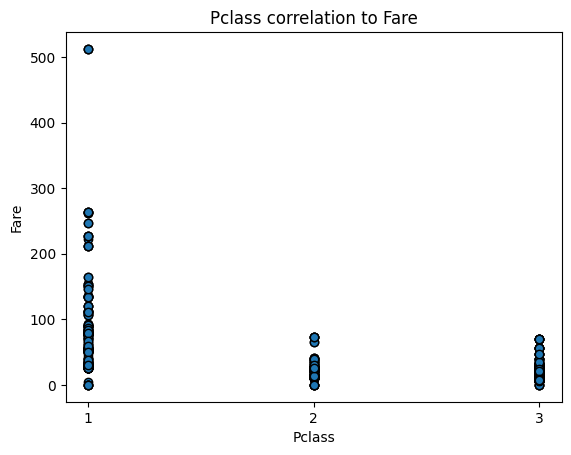

In [77]:
plt.scatter(dataset['Pclass'],dataset['Fare'],edgecolor="black")
plt.xticks([1, 2, 3], ['1', '2', '3'])

plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Pclass correlation to Fare')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

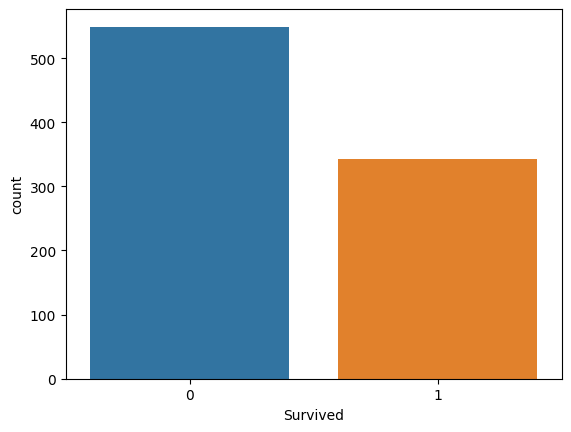

In [78]:
sns.countplot(x="Survived",data=dataset)

<Axes: xlabel='Survived', ylabel='count'>

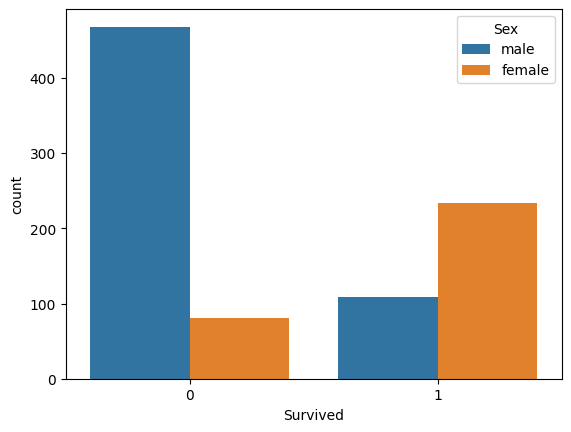

In [79]:
sns.countplot(x="Survived",data=dataset, hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

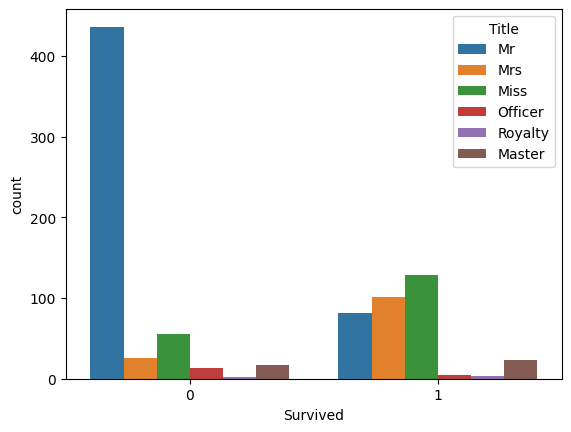

In [80]:
sns.countplot(x="Survived",data=dataset,hue="Title")

<Axes: xlabel='Survived', ylabel='count'>

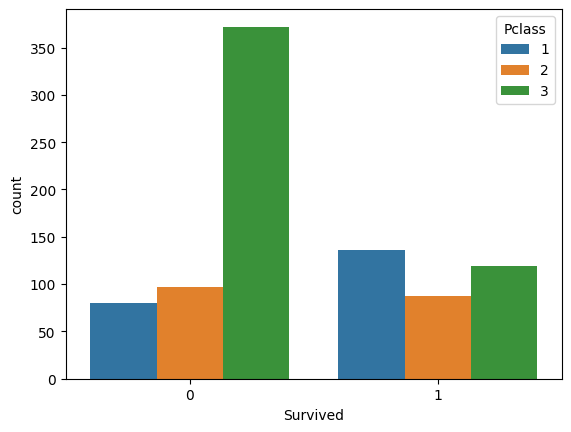

In [81]:
sns.countplot(x="Survived",data=dataset,hue="Pclass")

In [82]:
df_encoded = pd.get_dummies(dataset, columns=['Title', ])


In [83]:
df_encoded

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,146,0,0,0,1,0,0,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,140,0,0,0,1,0,0,0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,146,0,0,0,1,0,0,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,146,0,0,0,0,1,0,0
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,38,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,146,1,0,0,0,1,0,0
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,146,1,0,0,1,0,0,0
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,146,0,0,1,0,0,0,0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.0,0,0,349215,7.8958,146,0,0,0,1,0,0,0


<Axes: xlabel='Survived', ylabel='count'>

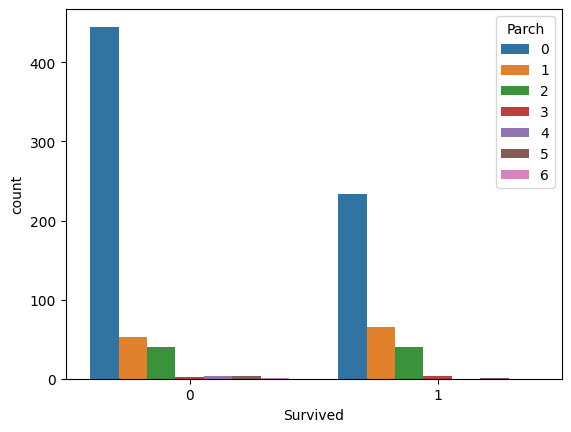

In [86]:
# @title adding family size feature
sns.countplot(x="Survived",data=df_encoded,hue="Parch")

<Axes: xlabel='Survived', ylabel='count'>

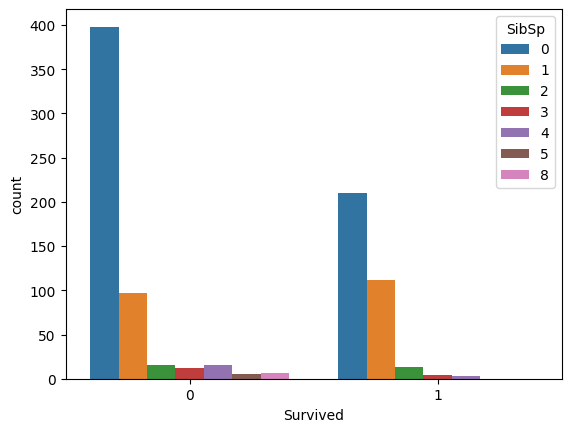

In [87]:
sns.countplot(x="Survived",data=df_encoded,hue="SibSp")

In [88]:
df_encoded['Family_size']=df_encoded['Parch']+df_encoded['SibSp']+1
df_encoded

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Family_size
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,146,0,0,0,1,0,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,140,0,0,0,1,0,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,146,0,0,0,1,0,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,146,0,0,0,0,1,0,0,5
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,38,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,146,1,0,0,0,1,0,0,2
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,146,1,0,0,1,0,0,0,1
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,146,0,0,1,0,0,0,0,1
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.0,0,0,349215,7.8958,146,0,0,0,1,0,0,0,1


In [89]:
df_encoded.drop(['SibSp','Parch'],axis=1,inplace=True)
df_encoded


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Family_size
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,248740,13.0000,146,0,0,0,1,0,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,348123,7.6500,140,0,0,0,1,0,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,350050,7.8542,146,0,0,0,1,0,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,349909,21.0750,146,0,0,0,0,1,0,0,5
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,F.C. 12750,52.0000,38,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,146,1,0,0,0,1,0,0,2
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,2669,7.2292,146,1,0,0,1,0,0,0,1
888,535,0,3,"Cacic, Miss. Marija",female,30.0,315084,8.6625,146,0,0,1,0,0,0,0,1
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.0,349215,7.8958,146,0,0,0,1,0,0,0,1


In [91]:
df_encoded.drop(['Name','PassengerId'],axis=1,inplace=True)
sex_replacements={"male":0,"female":1}
df_encoded['Sex'].replace(sex_replacements,inplace=True)
df_encoded.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Family_size
0,0,2,0,28.0,248740,13.0000,146,0,0,0,1,0,0,0,1
1,0,3,0,25.0,348123,7.6500,140,0,0,0,1,0,0,0,1
2,0,3,0,20.0,350050,7.8542,146,0,0,0,1,0,0,0,1
3,0,3,1,29.0,349909,21.0750,146,0,0,0,0,1,0,0,5
4,0,1,0,31.0,F.C. 12750,52.0000,38,0,0,0,1,0,0,0,2


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
X=df_encoded.drop(["Survived","Ticket"],axis=1)
Y=df_encoded['Survived']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=0)


In [95]:
log_reg=LogisticRegression(max_iter=2000)
log_reg.fit(X_train,Y_train)

LogisticRegression(max_iter=2000)

In [96]:
Y_pred=log_reg.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

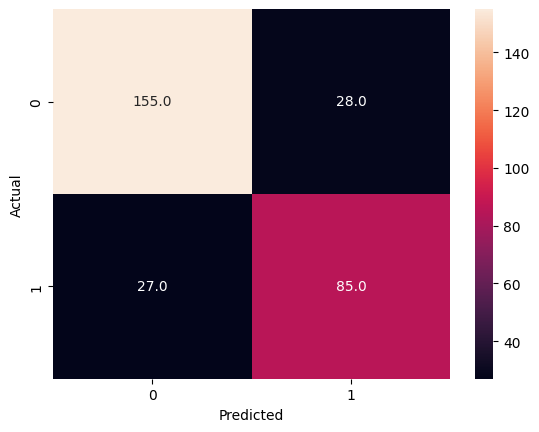

In [100]:
cm = pd.crosstab(Y_test, Y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(cm, annot=True,fmt=".1f")

In [101]:
accuracy_score(Y_test,Y_pred)

0.8135593220338984